# Decision Tree for N-dimensional data and labels
The code below implements a **decision tree** calculated for labelled data as well as Random Forests.

## Libraries
First, some libraries are loaded and global figure settings are made for exporting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
from math import log, e
import random
import sys
import os
import matplotlib.image as mpimg
from IPython.core.display import Image, display
from tqdm import tqdm_notebook
from six.moves import reload_module

### Custom Libraries

In [2]:
from density_tree.decision_tree_create import *
from density_tree.create_data import *
from density_tree.helpers import *
from density_tree.plots import *

# Generic Functions
The methods implemented for producing a decision tree can be found in the python files under the package `density_tree`.


### Generate Data

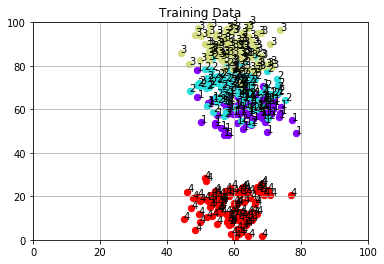

In [3]:
# cluster parameters
nclusters=4
dimensions=2
covariance=40
minRange=0
maxRange=100
npoints=100

    
dataset, clusters = createData(nclusters, dimensions, covariance, npoints, 
                                              minRange = minRange, maxRange = maxRange)

fig, ax = plt.subplots(1,1)
plotData(clusters, "Training Data", ax, clusters=clusters,
                  minRange = minRange, maxRange = maxRange, covariance=0)
plt.show()

### Calculate the entropy over all possible split values in all dimensions (`calc_entropy attribute`)


Now we can iterate the same procedure over the both splitted sides until there is no split left.

In [4]:
root = create_decision_tree(dataset)

In [5]:
root.depth()


9

In [6]:
reload_module(helpers)
dataset_grid_eval = get_grid_labels(dataset, root, minRange, maxRange)

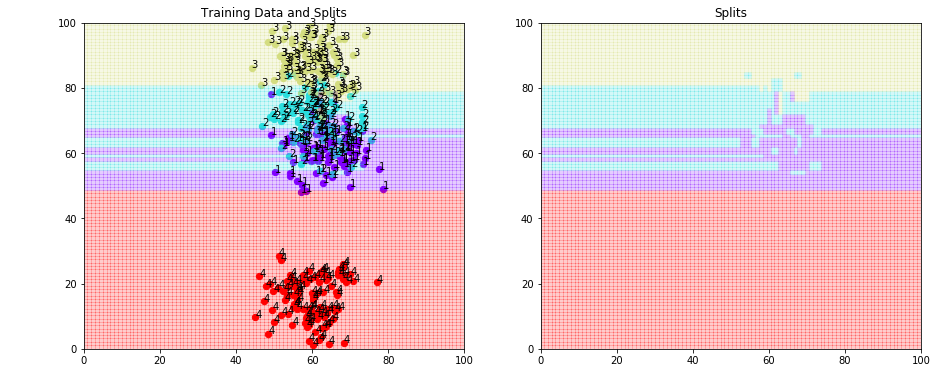

In [7]:
visualize_decision_boundaries(dataset, root, minRange, maxRange)

The overfitting of the tree clearly shows in the decision boundaries above.
# Output the decision forest to a $\LaTeX$ figure

In [8]:
tree_string = ""
tree_string = helpers.print_decision_tree_latex(root,tree_string)

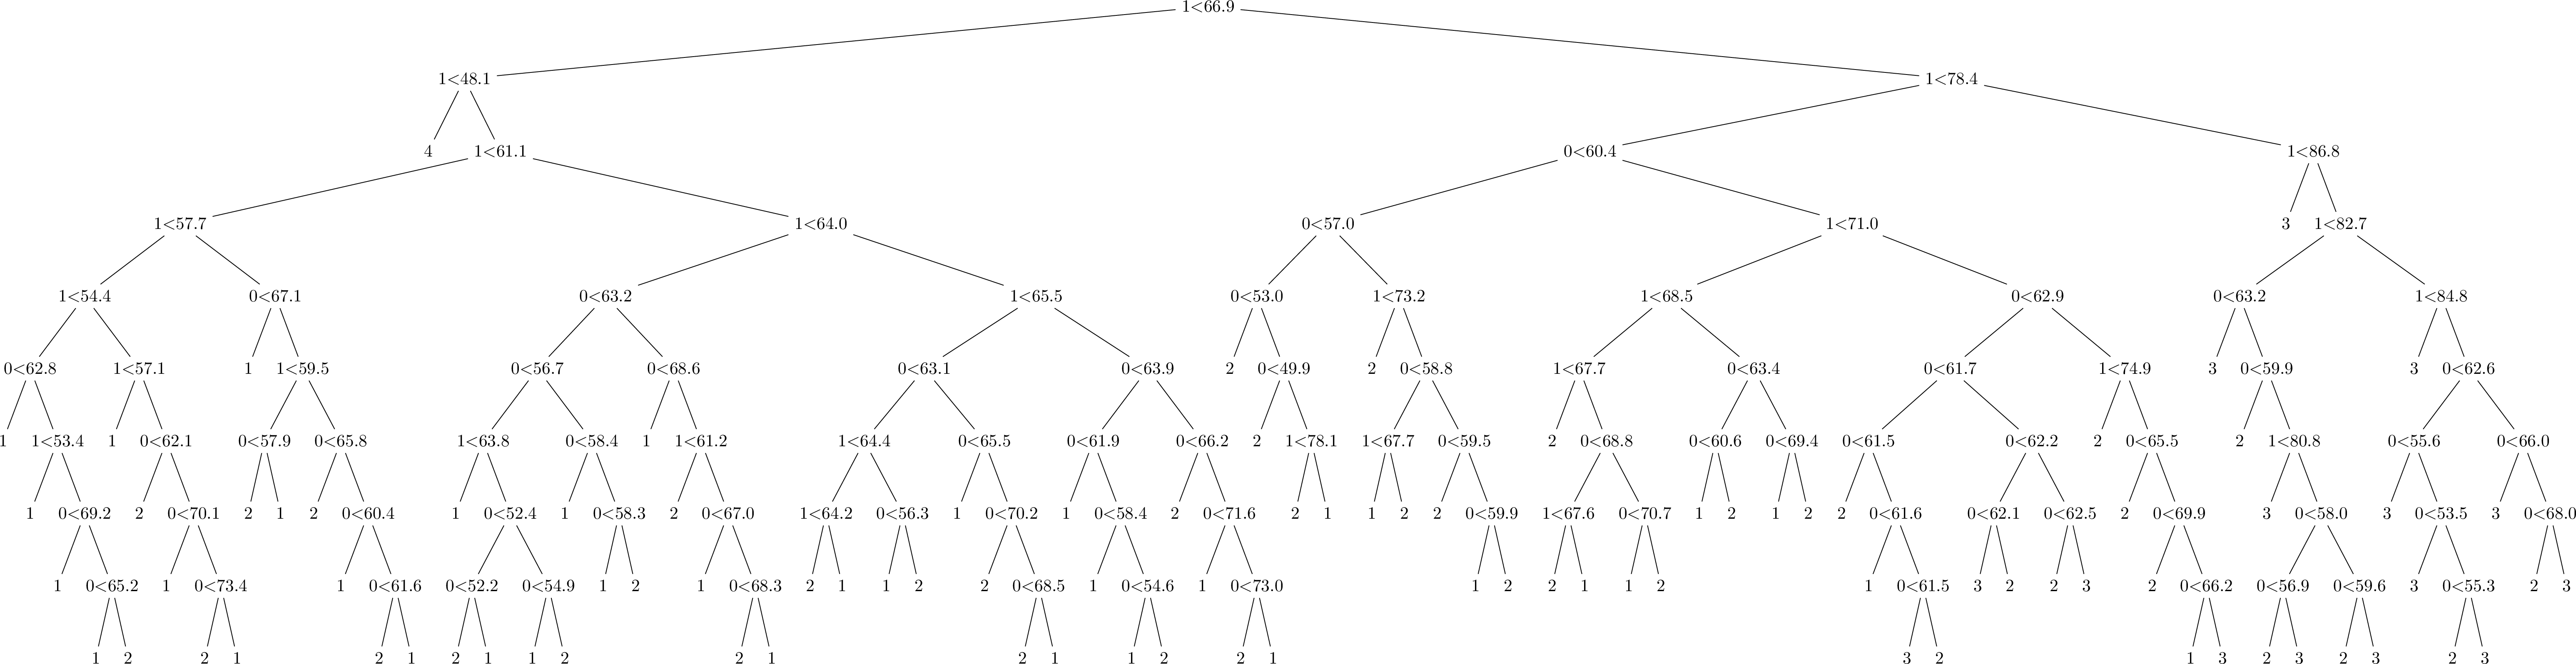

In [9]:
def tree_visualize(root):
    tree_string = ""
    tree_string = helpers.print_decision_tree_latex(root,tree_string)
    
    os.system("cd figures; rm main.tex; more main_pt1.tex >> main.tex; echo '' >> main.tex;  echo '" + tree_string + "' >> main.tex;  more main_pt2.tex >> main.tex;")
    os.system("cd figures; /Library/TeX/texbin/pdflatex main.tex; convert -density 300 -trim main.pdf -quality 100 main.png")
    display(Image('./figures/main.png', retina=True))
    
tree_visualize(root)

We can see that the Decision Tree overfits and creates way too many splits. We will thus train many individual trees on a subset of the data.
# Random Forest
- Draw random subsamples of data with replacement
- Create individual decision trees on subsamples
- Visualize decision boundaries

In [10]:
root_nodes = random_forest_build(dataset,1000, .3, n_jobs = -1)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   16.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   29.9s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   37.8s finished


In [11]:
# evaluate labels of original dataset using RF
dataset_test = dataset[:,:2]
dataset_eval = random_forest.random_forest_traverse(dataset_test, root_nodes)

A Jupyter Widget

A Jupyter Widget

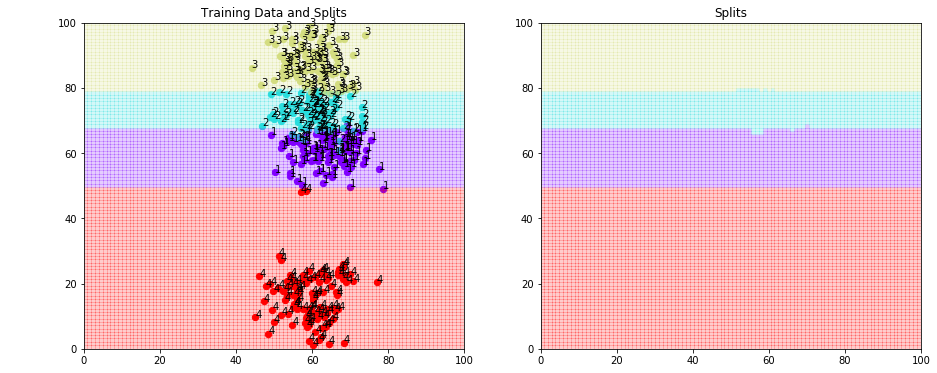

In [12]:
# show data using Random Forests
visualize_decision_boundaries(dataset_eval, root_nodes, minRange, maxRange, rf = True)

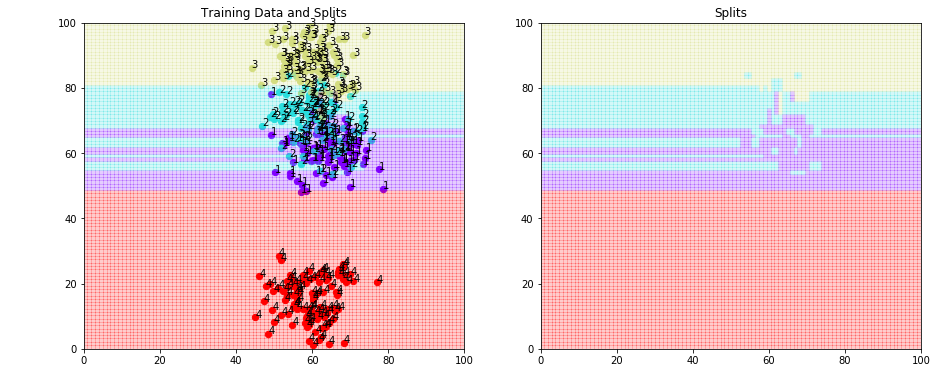

In [13]:
# compare to using only one decision tree:
visualize_decision_boundaries(dataset, root, minRange, maxRange)